<a href="https://colab.research.google.com/github/rafikun14-new/myrepositories/blob/main/LSTM%2Bbayesian_for_power_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:

url = 'https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption'
data = pd.read_csv('/content/drive/MyDrive/datasets/household_power_consumption.txt', sep=';', low_memory=False, on_bad_lines='skip')

In [ ]:

data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


The following line is included in the code to combine separate Date and Time columns into a single datetime column. This step is often necessary when working with time series data to ensure that the data is in a format that is easy to manipulate, resample, and use for time-based operations. The combined datetime column allows for efficient resampling (e.g., converting minute-level data to hour-level data) and for creating additional features like 'hour of the day' or 'day of the week.'

In [ ]:

data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

In [ ]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [ ]:
data.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979
datetime,0


In [ ]:

data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
datetime,0


In [ ]:

non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'datetime'],
      dtype='object')


In [ ]:

data_numeric = data.drop(columns=non_numeric_columns)

In [ ]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [ ]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'datetime'],
      dtype='object')

In [ ]:
print(data_numeric)

         Sub_metering_3
0                  17.0
1                  16.0
2                  17.0
3                  17.0
4                  17.0
...                 ...
2075254             0.0
2075255             0.0
2075256             0.0
2075257             0.0
2075258             0.0

[2049280 rows x 1 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
 9   datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 172.0+ MB


In [ ]:
data.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
datetime,0


In [ ]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [ ]:

data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

In [ ]:
# Verify that the conversion worked and the datetime column is of the correct type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
 9   datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 172.0+ MB
None


In [ ]:

data['day_of_year'] = data['datetime'].dt.dayofyear
data['hour_of_day'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek

In [ ]:

final_columns = ['day_of_year', 'hour_of_day', 'day_of_week',
                 'Global_active_power', 'Global_reactive_power', 'Voltage',
                 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

data_final = data[final_columns]


In [ ]:
# Display the first few rows of the final dataset
data_final.head()

,day_of_year,hour_of_day,day_of_week,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,350,17,5,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,350,17,5,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,350,17,5,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,350,17,5,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,350,17,5,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
X=data_final.drop('Global_active_power',axis=1)
y=data_final['Global_active_power']

In [ ]:
X.head()

,day_of_year,hour_of_day,day_of_week,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,350,17,5,0.418,234.840,18.400,0.000,1.000,17.0
1,350,17,5,0.436,233.630,23.000,0.000,1.000,16.0
2,350,17,5,0.498,233.290,23.000,0.000,2.000,17.0
3,350,17,5,0.502,233.740,23.000,0.000,1.000,17.0
4,350,17,5,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
y.head()

,Global_active_power
0,4.216
1,5.360
2,5.374
3,5.388
4,3.666


Lets do standardization before splitting

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.std()

0.9999999999999991

In [ ]:
print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)


X_scaled shape: (2049280, 9)
y shape: (2049280,)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1639424, 9)
X_test shape: (409856, 9)
y_train shape: (1639424,)
y_test shape: (409856,)


Building the LSTM Model

In [ ]:
!pip install bayesian-optimization

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from bayes_opt import BayesianOptimization

In [ ]:

def create_lstm_model(num_lstm_units, num_dense_units, dropout_rate, learning_rate):
    model = Sequential()
    model.add(LSTM(units=int(num_lstm_units), return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(rate=dropout_rate))
    model.add(LSTM(units=int(num_lstm_units)))
    model.add(Dense(units=int(num_dense_units), activation='relu'))
    model.add(Dense(1))  # Output layer
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [ ]:

def lstm_evaluate(num_lstm_units, num_dense_units, dropout_rate, learning_rate):
    model = create_lstm_model(num_lstm_units, num_dense_units, dropout_rate, learning_rate)
    model.fit(X_train, y_train, epochs=1, batch_size=64, verbose=1)
    loss = model.evaluate(X_test, y_test, verbose=0)
    return -loss  # Minimize loss

In [ ]:
print(X_train.dtype)
print(y_train.dtype)

float64
object


In [ ]:
X_test.shape


(409856, 9)

In [ ]:
y_test.shape

(409856,)

In [ ]:
y_train = np.asarray(y_train, dtype=np.float32)
print(y_train.dtype)

float32


In [ ]:
# Ensure y_test is of numeric type
y_test = y_test.astype(np.float32)

In [ ]:
print("X_test shape:", X_test.shape)

print("y_test shape:", y_test.shape)

X_test shape: (409856, 9)
y_test shape: (409856,)


In [ ]:
# Bayesian Optimization
params = {
    'num_lstm_units': (50, 500),
    'num_dense_units': (10, 100),
    'dropout_rate': (0.1, 0.5),
    'learning_rate': (1e-4, 1e-2)
}

optimizer = BayesianOptimization(
    f=lstm_evaluate,
    pbounds=params,
    random_state=42
)

optimizer.maximize(init_points=1, n_iter=1)

|   iter    |  target   | dropou... | learni... | num_de... | num_ls... |
-------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25616/25616 ━━━━━━━━━━━━━━━━━━━━ 161s 6ms/step - loss: 0.0605
| 1         | -0.002249 | 0.2498    | 0.009512  | 75.88     | 319.4     |


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25616/25616 ━━━━━━━━━━━━━━━━━━━━ 235s 9ms/step - loss: 0.0365
| 2         | -0.001258 | 0.2201    | 0.006391  | 19.71     | 486.5     |


In [ ]:
# Extract the best parameters
best_params = optimizer.max['params']
print("Best Parameters:", best_params)

Best Parameters: {'dropout_rate': 0.22011070021887452, 'learning_rate': 0.006390790795203595, 'num_dense_units': 19.71102170343024, 'num_lstm_units': 486.4691499690473}


In [ ]:
# Build and train the final model
final_model = create_lstm_model(
    num_lstm_units=int(best_params['num_lstm_units']),
    num_dense_units=int(best_params['num_dense_units']),
    dropout_rate=best_params['dropout_rate'],
    learning_rate=best_params['learning_rate']
)

history = final_model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/2
20493/20493 ━━━━━━━━━━━━━━━━━━━━ 215s 10ms/step - loss: 0.0507 - val_loss: 0.0029
Epoch 2/2
20493/20493 ━━━━━━━━━━━━━━━━━━━━ 264s 11ms/step - loss: 0.0018 - val_loss: 0.0015


In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (409856, 9)
y_test shape: (409856,)


In [ ]:
print(X_test.dtype)
print(y_test.dtype)


float64
object


In [ ]:
y_test = np.asarray(y_test, dtype=np.float32) #Ensure that both X_test and y_test are of the correct data type.
                                              #Typically, they should be float32 for most neural network tasks
print(y_test.dtype)

float32


In [ ]:
# Evaluate the model
loss = final_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

12808/12808 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 0.0015
Test Loss: 0.0015069348737597466


In [ ]:
# Predict and visualize
y_pred = final_model.predict(X_test)

12808/12808 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step


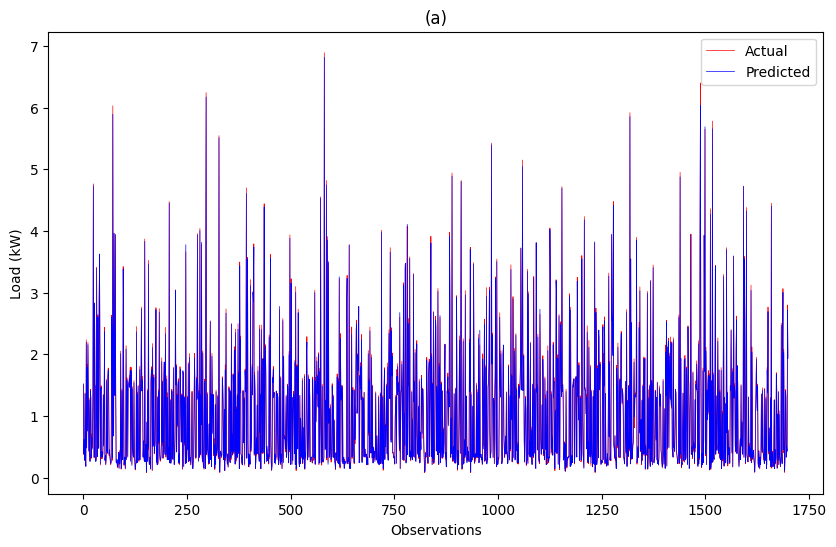

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

plt.plot(y_test[:1700], color='red', label='Actual', linewidth=0.5)
plt.plot(y_pred[:1700], color='blue', label='Predicted', linewidth=0.5)


# Add a legend to the plot
plt.legend(loc='upper right')

# Add axis labels and a title
plt.xlabel('Observations')  # X-axis label
plt.ylabel('Load (kW)')      # Y-axis label
plt.title('(a)')             # Title or subplot label, as in your example

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.02600574865937233
Root Mean Squared Error (RMSE): 0.03881925716996193


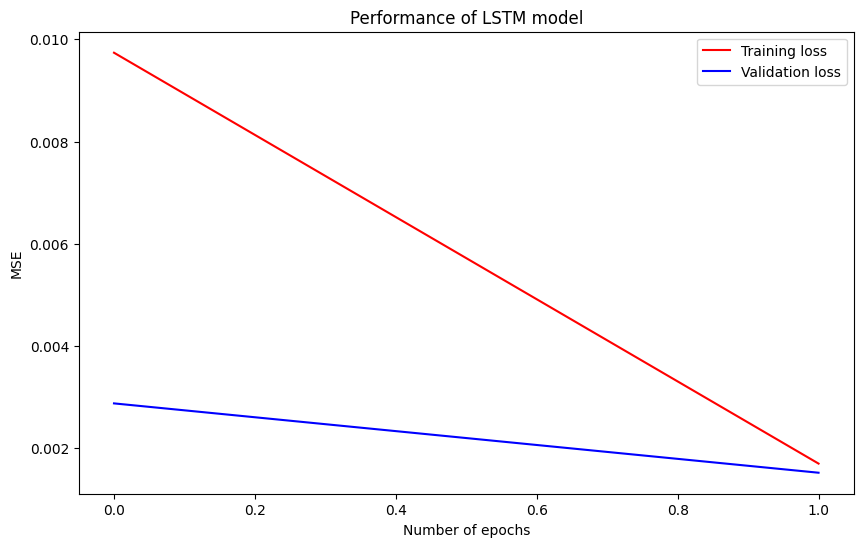

In [ ]:
# Plot the training and validation MSE over epochs
plt.figure(figsize=(10, 6))

# Plot MSE for training data
plt.plot(history.history['loss'], color='red', label='Training loss')

# Plot MSE for validation data
plt.plot(history.history['val_loss'], color='blue', label='Validation loss')

# Add labels and title
plt.xlabel('Number of epochs')
plt.ylabel('MSE')
plt.title('Performance of LSTM model')

# Add legend
plt.legend(loc='upper right')

# Display the plot
plt.show()


if there were more epochs, the convergence would have been clearer

ADDITIONAL PART:

-If you want to show RMSE like above, you can add it as a metrics in the compiling step like this:

In [ ]:
from keras import backend as K

# Custom RMSE metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Compile the model with RMSE as an additional metric
final_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[rmse])
#Train the Model and Save History:
history = final_model.fit(X_train, y_train, epochs=60, batch_size=64, validation_split=0.2, verbose=1)


THEN PLOT A SIMILAR FIGURE AS ABOVE